# Dataset
The following categorical variables have been encoded into numberic ordinal scale:

- Education
1 'Below College'
2 'College'
3 'Bachelor'
4 'Master'
5 'Doctor'

- EnvironmentSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

- JobInvolvement
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

- JobSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

- PerformanceRating
1 'Low'
2 'Good'
3 'Excellent'
4 'Outstanding'

- RelationshipSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

- WorkLifeBalance
1 'Bad'
2 'Good'
3 'Better'
4 'Best'

# Libraries

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data


In [88]:
#Read CSV
df = pd.read_csv('hr_attrition_data.csv')
# Add colums with categorical variables for visualization
df['Attrition_Flag'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df['Education_label'] = df['Education'].map({1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'})
df['EnvironmentSatisfaction_label'] = df['EnvironmentSatisfaction'].map({ 1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'})
df['JobInvolvement_label'] = df['JobInvolvement'].map({1 : 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'})
df['JobSatisfaction_label'] = df['JobSatisfaction'].map({1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'})
df['PerformanceRating_label'] = df['PerformanceRating'].map({1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding'})
df['RelationshipSatisfaction_label'] = df['RelationshipSatisfaction'].map({1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'})
df['WorkLifeBalance_label'] = df['WorkLifeBalance'].map({1:'Bad',2:'Good', 3: 'Better', 4: 'Best'})
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 43 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             1470 non-null   int64 
 1   Attrition                       1470 non-null   object
 2   BusinessTravel                  1470 non-null   object
 3   DailyRate                       1470 non-null   int64 
 4   Department                      1470 non-null   object
 5   DistanceFromHome                1470 non-null   int64 
 6   Education                       1470 non-null   int64 
 7   EducationField                  1470 non-null   object
 8   EmployeeCount                   1470 non-null   int64 
 9   EmployeeNumber                  1470 non-null   int64 
 10  EnvironmentSatisfaction         1470 non-null   int64 
 11  Gender                          1470 non-null   object
 12  HourlyRate                      1470 non-null   

In [89]:
#Show first 5 data entries
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Flag,Education_label,EnvironmentSatisfaction_label,JobInvolvement_label,JobSatisfaction_label,PerformanceRating_label,RelationshipSatisfaction_label,WorkLifeBalance_label
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,0,5,1,College,Medium,High,Very High,Excellent,Low,Bad
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,1,7,0,Below College,High,Medium,Medium,Outstanding,Very High,Better
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,0,0,1,College,Very High,Medium,High,Excellent,Medium,Better
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,0,0,Master,Very High,High,High,Excellent,High,Better
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,2,2,0,Below College,Low,High,Medium,Excellent,Very High,Better


In [90]:
# Find duplicate rows based EmployeeCount, Over18 and StandardHours
duplicate = df[df.duplicated(['EmployeeCount', 'Over18', 'StandardHours'])]
print("Duplicate Rows based on EmployeeCount, Over18, StandardHours :")
duplicate[['EmployeeCount', 'Over18', 'StandardHours']].head(5)
 

Duplicate Rows based on EmployeeCount, Over18, StandardHours :


,EmployeeCount,Over18,StandardHours
1,1,Y,80
2,1,Y,80
3,1,Y,80
4,1,Y,80
5,1,Y,80


In [91]:
# Count duplicate rows based EmployeeCount, Over18 and StandardHours
print("Duplicate Rows:")
duplicate[['EmployeeCount', 'Over18', 'StandardHours']].shape[0]

Duplicate Rows:


1469

# Preprocessing

In [92]:
# Remove columns with duplicated rows
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

In [93]:
df.dtypes

Age                                int64
Attrition                         object
BusinessTravel                    object
DailyRate                          int64
Department                        object
DistanceFromHome                   int64
Education                          int64
EducationField                    object
EnvironmentSatisfaction            int64
Gender                            object
HourlyRate                         int64
JobInvolvement                     int64
JobLevel                           int64
JobRole                           object
JobSatisfaction                    int64
MaritalStatus                     object
MonthlyIncome                      int64
MonthlyRate                        int64
NumCompaniesWorked                 int64
OverTime                          object
PercentSalaryHike                  int64
PerformanceRating                  int64
RelationshipSatisfaction           int64
StockOptionLevel                   int64
TotalWorkingYear

# Attrition Calculations

## Analyze and Visualize a single categorical variable

In [94]:

# Calculate the percentage of attrition for each education level
attrition_by_education = df.groupby('Education_label')['Attrition'].value_counts(normalize=False).reset_index(name='AttritionCount')


attrition_by_education['Percentage'] = df.groupby('Education_label')['Attrition'].value_counts(normalize=True).mul(100).values
attrition_by_education =attrition_by_education.sort_values(by='Percentage', ascending=False) # Sort by percentage
attrition_by_education


,Education_label,Attrition,AttritionCount,Percentage
6,Doctor,No,43,89.583333
8,Master,No,340,85.427136
4,College,No,238,84.397163
0,Bachelor,No,473,82.692308
2,Below College,No,139,81.764706
3,Below College,Yes,31,18.235294
1,Bachelor,Yes,99,17.307692
5,College,Yes,44,15.602837
9,Master,Yes,58,14.572864
7,Doctor,Yes,5,10.416667


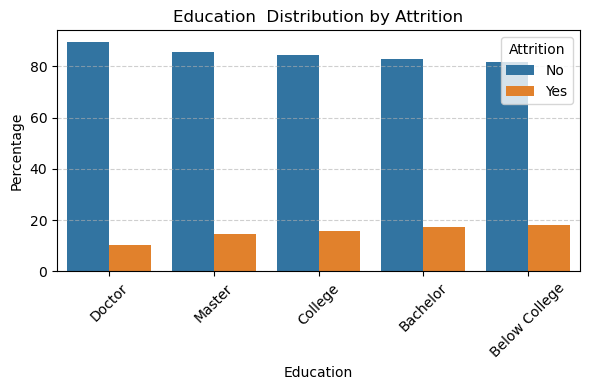

In [109]:
# Create the barplot for attrition_by_education
plt.figure(figsize=(6, 4))  # Adjust figure size as needed
sns.barplot(x='Education_label', y='Percentage', hue='Attrition', data=attrition_by_education)
plt.title(f'Education  Distribution by Attrition')
plt.xlabel('Education')
plt.ylabel('Percentage')
plt.grid(True, linestyle='--', alpha=0.6, axis='y')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


## Analyze multiple categorical variables by creating functions


Table for BusinessTravel:
| BusinessTravel    | Attrition   | count   | percentage   |
|:------------------|:------------|:--------|:-------------|
| Non-Travel        | No          | 138     | 92           |
| Travel_Rarely     | No          | 887     | 85.0431      |
| Travel_Frequently | No          | 208     | 75.0903      |
| Travel_Frequently | Yes         | 69      | 24.9097      |
| Travel_Rarely     | Yes         | 156     | 14.9569      |
| Non-Travel        | Yes         | 12      | 8            |

Table for Department:
| Department             | Attrition   | count   | percentage   |
|:-----------------------|:------------|:--------|:-------------|
| Research & Development | No          | 828     | 86.1602      |
| Human Resources        | No          | 51      | 80.9524      |
| Sales                  | No          | 354     | 79.3722      |
| Sales                  | Yes         | 92      | 20.6278      |
| Human Resources        | Yes         | 12      | 19.0476      |


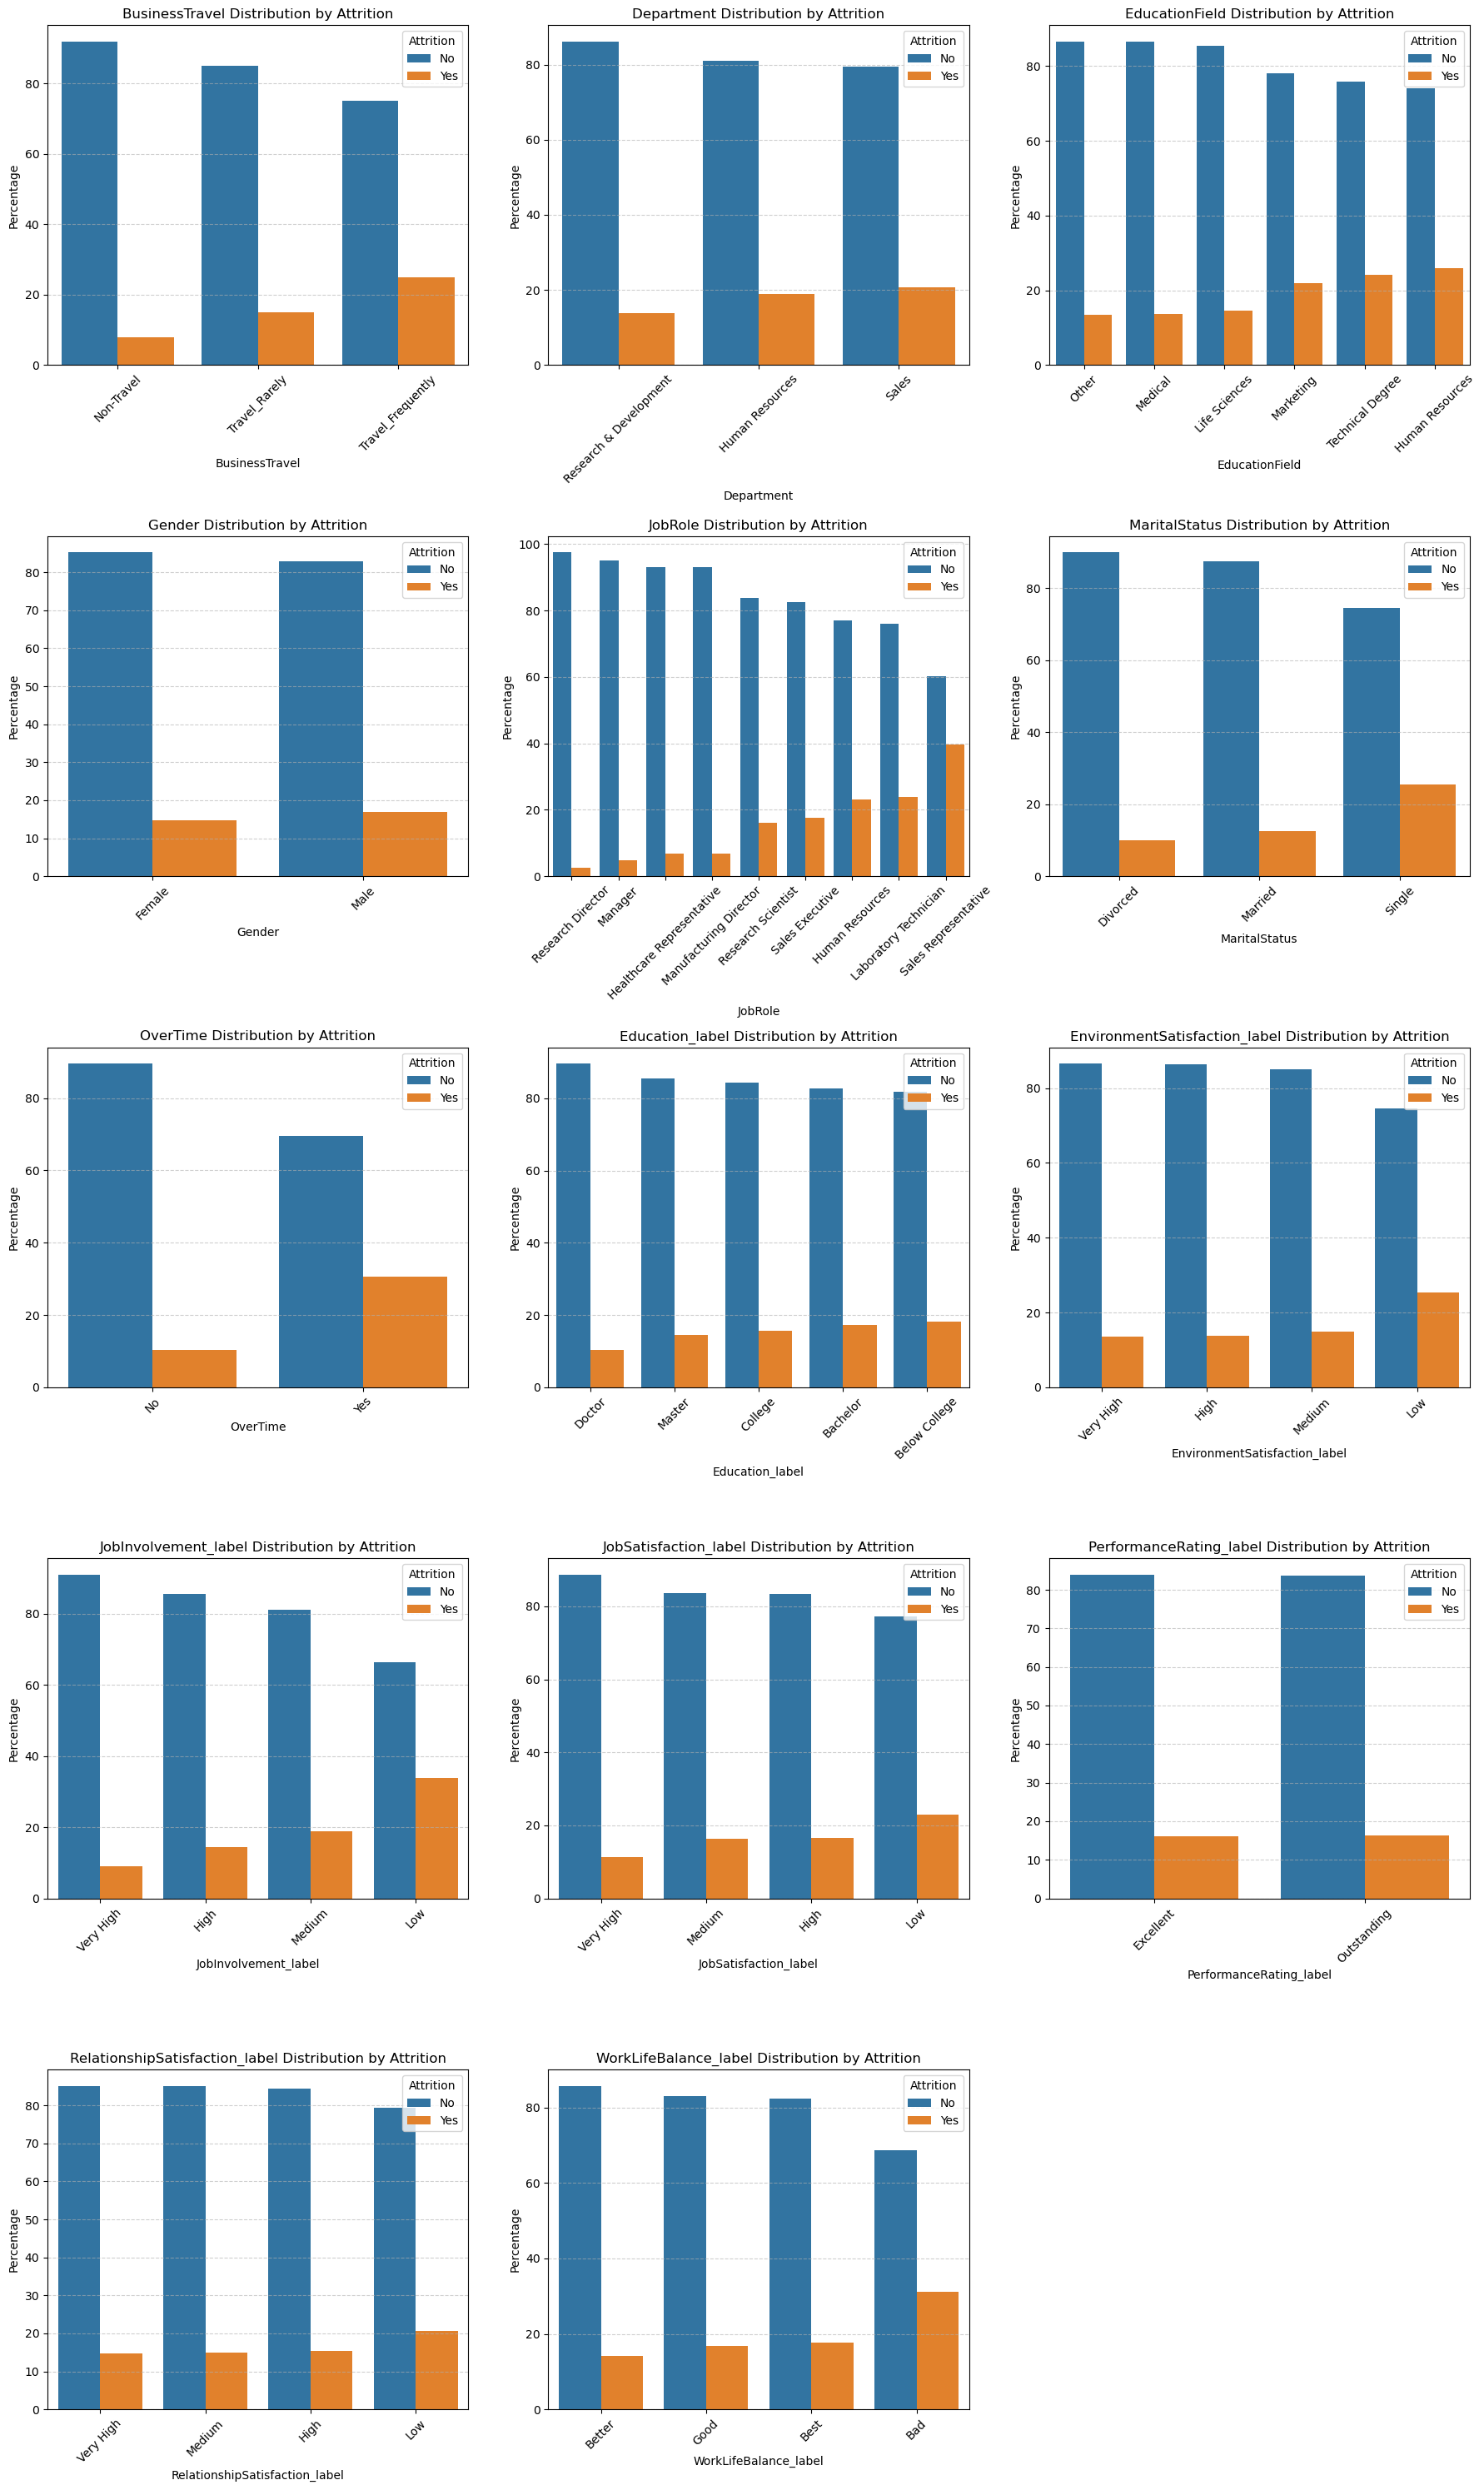

In [107]:
def create_plots(data, categorical_vars, y_var):
    """
    Creates a panel of bar plots for categorical variables, arranged in a grid,
    with a specified y-variable, displaying percentages instead of counts.  Also
    prints a table of the counts and percentages, sorted by percentage.

    Args:
        data: pandas DataFrame containing the data.
        categorical_vars: List of categorical column names to create bar plots for.
        y_var: The variable to use for grouping the bars within each category.
    """
    num_cat_vars = len(categorical_vars)
    ncols = min(num_cat_vars, 3)  # Maximum 3 columns
    nrows = (num_cat_vars + ncols - 1) // ncols  # Calculate the number of rows

    fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * 6, nrows * 6))  # Adjust figsize
    if num_cat_vars == 1:
        axes = [axes]  # Ensure axes is iterable

    plot_index = 0  # Keep track of which plot to put on which subplot
    # Create bar plots for categorical variables
    for var in categorical_vars:
        row = plot_index // ncols
        col = plot_index % ncols
        ax = axes[row, col] if nrows > 1 else axes[col]

        # Calculate percentages
        df_agg = data.groupby(var)[y_var].value_counts(normalize=False).reset_index(name='count')
        df_agg['percentage'] = data.groupby(var)[y_var].value_counts(normalize=True).mul(100).values
        df_agg = df_agg.sort_values(by='percentage', ascending=False) # Sort by percentage

        sns.barplot(x=var, y='percentage', hue=y_var, data=df_agg, ax=ax)
        ax.set_title(f'{var} Distribution by {y_var}')
        ax.set_xlabel(var)
        ax.set_ylabel('Percentage')
        ax.grid(True, linestyle='--', alpha=0.6, axis='y')
        ax.tick_params(axis='x', rotation=45)
        plot_index += 1

        # Print the table of counts and percentages
        print(f"\nTable for {var}:")
        print(df_agg.astype(str).to_markdown(index=False, numalign="left", stralign="left"))

    # Remove any unused subplots
    if num_cat_vars < nrows * ncols:
        for i in range(num_cat_vars, nrows * ncols):
            row = i // ncols
            col = i % ncols
            ax = axes[row, col] if nrows > 1 else axes[col]
            fig.delaxes(ax)

    plt.tight_layout()
    plt.show()



if __name__ == '__main__':
 
    # List categorical columns you want to analyze
    categorical_cols_to_analyze = df.select_dtypes(include=object).columns
    # Remove Attrition colum
    categorical_cols_to_analyze = [column_x for column_x in categorical_cols_to_analyze  if column_x != 'Attrition']

    y_var = 'Attrition'

    create_plots(df, categorical_cols_to_analyze, y_var)


## Analyze and Visualize a single numerical variable

Note about Violin Plots from  https://seaborn.pydata.org/generated/seaborn.violinplot.html


Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

This can be an effective and attractive way to show multiple distributions of data at once, but keep in mind that the estimation procedure is influenced by the sample size, and violins for relatively small samples might look misleadingly smooth.


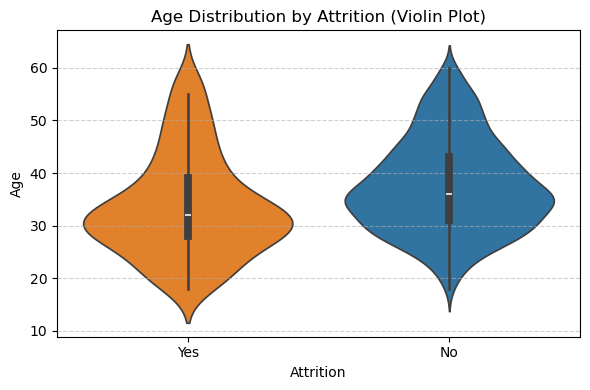

In [108]:
# Analyze and Visualize ViolinPlot with Variable Age 
plt.figure(figsize=(6, 4))
sns.violinplot(x='Attrition', y='Age', data=df, hue='Attrition', hue_order = ["No", "Yes"], dodge=False)
plt.title(f'Age Distribution by Attrition (Violin Plot)')
plt.xlabel('Attrition')
plt.ylabel('Age')
plt.grid(True, linestyle='--', alpha=0.6, axis='y')
plt.tight_layout()
plt.show()

## Analyze multiple numerical variables by creating functions

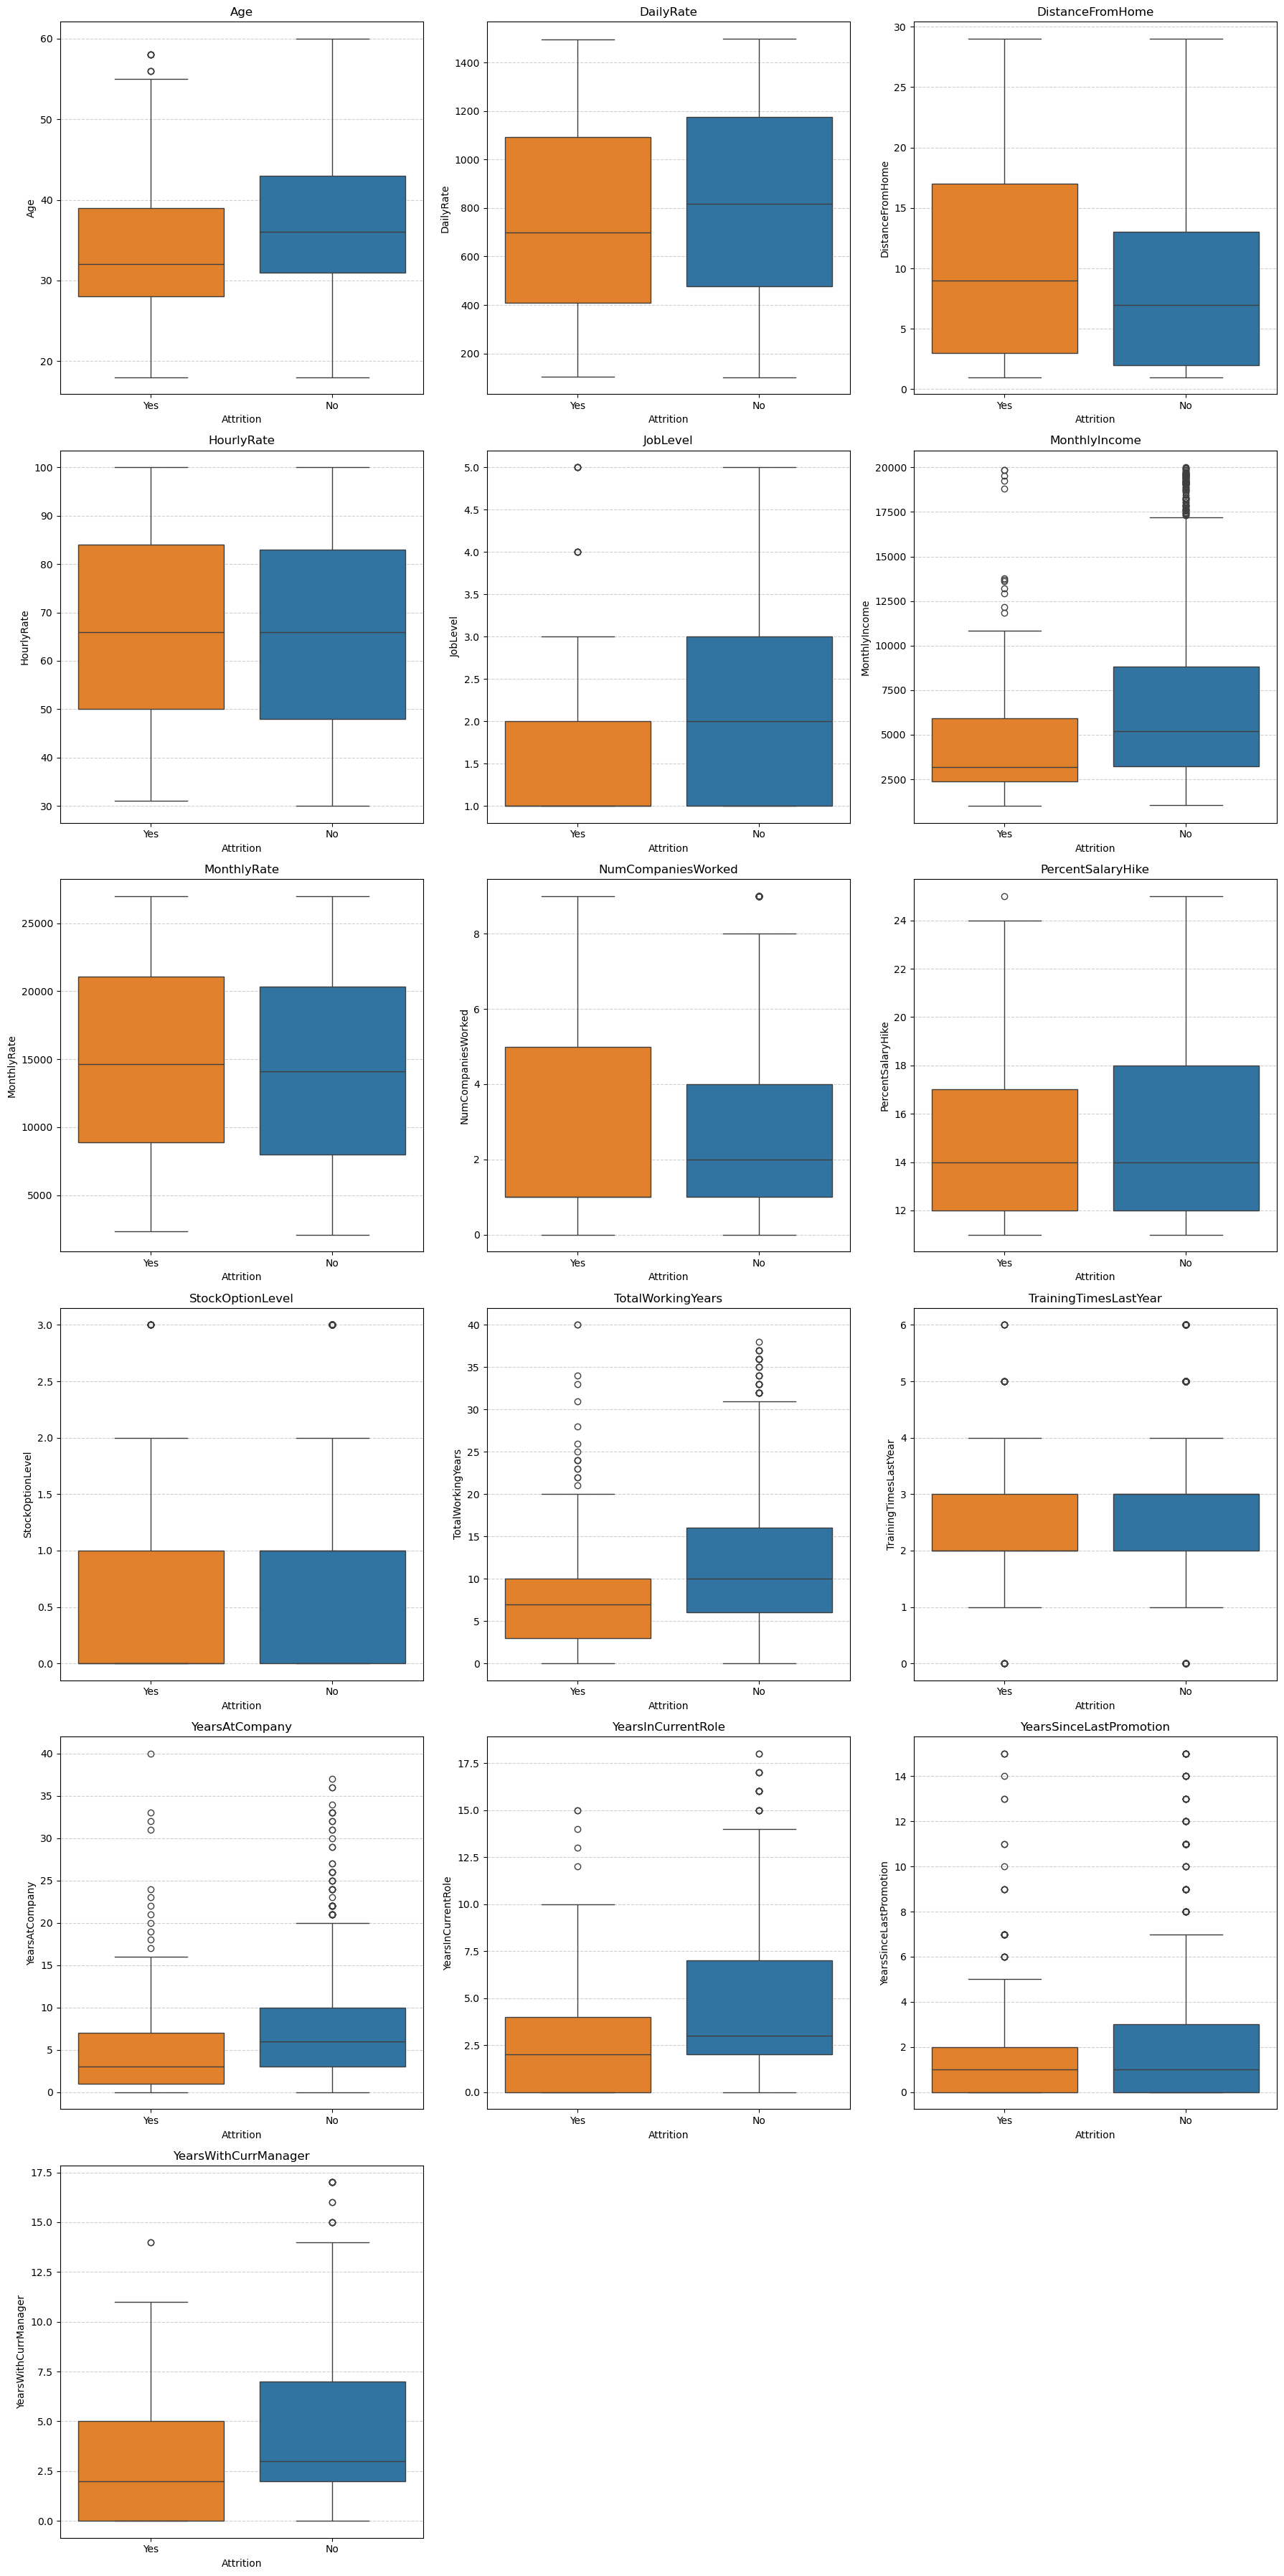

In [106]:
def create_box_plot_panel(data, numerical_vars):
    """
    Creates a panel of violin plots to visualize the distribution of numerical
    variables, arranged in a grid.

    Args:
        data: pandas DataFrame containing the data.
        numerical_vars: List of numerical column names to create violin plots for.
    """
    num_vars = len(numerical_vars)
    ncols = min(num_vars, 3)  # Maximum 3 columns
    nrows = (num_vars + ncols - 1) // ncols # Calculate the number of rows

    fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * 6, nrows * 6))  # Adjust figsize

    if num_vars == 1:
        axes = [axes]  # Ensure axes is iterable

    for i, var in enumerate(numerical_vars):
        row = i // ncols
        col = i % ncols
        ax = axes[row, col] if nrows > 1 else axes[col] # Handle single row case

        sns.boxplot( x='Attrition',y=var, data=data, ax=ax, hue='Attrition', hue_order = ["No", "Yes"], dodge=False)
        ax.set_title(f'{var}')
        ax.set_ylabel(var)
        ax.grid(True, linestyle='--', alpha=0.6, axis='y')

    # Remove any unused subplots if num_vars is not a multiple of 3
    if num_vars < nrows * ncols:
        for i in range(num_vars, nrows * ncols):
            row = i // ncols
            col = i % ncols
            ax = axes[row, col] if nrows > 1 else axes[col]
            fig.delaxes(ax)

    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    # List categorical columns you want to analyze
    numerical_cols_to_analyze = df.select_dtypes(include='int64').columns
    remove_categorical_cols_encodedasnum = ['Education', 'EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','PerformanceRating','RelationshipSatisfaction','WorkLifeBalance','Attrition_Flag']

    # Remove columns
    numerical_cols_to_analyze = [column_x for column_x in numerical_cols_to_analyze  if column_x not in remove_categorical_cols_encodedasnum]


    create_box_plot_panel(df, numerical_cols_to_analyze)


In [127]:

from scipy.stats import mannwhitneyu

def test_mannwhitney(data, numerical_vars, group_var):
    """
    Creates a panel of  Performs Mann-Whitney U test
    to compare the distributions of each numerical variable across groups.
    Optionally performs Mann-Whitney U test on y_var aggregated by group_var.

    Args:
    data: pandas DataFrame containing the data.
    numerical_vars: List of numerical column names to  perform the test on.
    group_var: Name of the categorical column to group the  by.
    """

    for i, var in enumerate(numerical_vars):

        # Perform Mann-Whitney U test on numerical vars
        groups = data[group_var].unique()
        if len(groups) == 2:
            group1_data = data[data[group_var] == groups[0]][var]
            group2_data = data[data[group_var] == groups[1]][var]
            u_statistic, p_value = mannwhitneyu(group1_data, group2_data, alternative='two-sided')
            if (p_value <= 0.05):
                print(f"Mann-Whitney U test for {var} and {group_var}:")
                print(f"U-statistic: {u_statistic:.2f}, P-value: {p_value:.5f}")
        elif len(groups) > 2:
            print(f"\nMann-Whitney U test for {var} and {group_var}:")
            print(f"  More than 2 groups, skipping test")
        else:
            print(f"\nMann-Whitney U test for {var} and {group_var}:")
            print(f"  Only one group, skipping test")

if __name__ == '__main__':
    # List categorical columns you want to analyze
    numerical_cols_to_analyze = df.select_dtypes(include='int64').columns
    remove_categorical_cols_encodedasnum = ['Education', 'EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','PerformanceRating','RelationshipSatisfaction','WorkLifeBalance','Attrition_Flag']

    # Remove columns
    numerical_cols_to_analyze = [column_x for column_x in numerical_cols_to_analyze  if column_x not in remove_categorical_cols_encodedasnum]
    group_var = 'Attrition' # Variable to aggregate and compare

    test_mannwhitney(df,numerical_cols_to_analyze, group_var)


Mann-Whitney U test for Age and Attrition:
U-statistic: 106859.00, P-value: 0.00000
Mann-Whitney U test for DailyRate and Attrition:
U-statistic: 133042.00, P-value: 0.02900
Mann-Whitney U test for DistanceFromHome and Attrition:
U-statistic: 164225.50, P-value: 0.00239
Mann-Whitney U test for JobLevel and Attrition:
U-statistic: 104729.50, P-value: 0.00000
Mann-Whitney U test for MonthlyIncome and Attrition:
U-statistic: 100620.50, P-value: 0.00000
Mann-Whitney U test for StockOptionLevel and Attrition:
U-statistic: 109611.00, P-value: 0.00000
Mann-Whitney U test for TotalWorkingYears and Attrition:
U-statistic: 100567.00, P-value: 0.00000
Mann-Whitney U test for TrainingTimesLastYear and Attrition:
U-statistic: 134785.50, P-value: 0.04730
Mann-Whitney U test for YearsAtCompany and Attrition:
U-statistic: 102582.00, P-value: 0.00000
Mann-Whitney U test for YearsInCurrentRole and Attrition:
U-statistic: 105214.00, P-value: 0.00000
Mann-Whitney U test for YearsSinceLastPromotion and Att